# Principal Component Analysis (PCA)


## Introduction
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

Dimensionality Reduction using PCA on multivariate timeseries data: https://medium.com/@ansjin/dimensionality-reduction-using-pca-on-multivariate-timeseries-data-b5cc07238dc4

Principal Components Analysis of a set of stocks price data http://slendermeans.org/ml4h-ch8.html

SSA (Singular Spectrum Analysis) versus PCA (Principal Component Analysis)

http://karthur.org/2017/learning-for-time-series-ssa-vs-pca.html You should immediately notice one similarity between PCA and SSA. They both can be computed through either a spectral decomposition of a covariance matrix or through an SVD of the data matrix, taking careful note that the data matrix in SSA is the trajectory matrix for a single time series record.

Elsner and Tsonis (1996) claim that aside from the difference between the composition of X, i.e., between the trajectory matrix (containing lagged windows of a univariate time series) in SSA and the data matrix of PCA (containing multivariate time series records), "there is no difference between the expansion [of the data set] used in classical PCA and the expansion [of the data set] in SSA." More specifically, PCA can be defined as the spectral decomposition of the covariance matrix XTX whereas SSA can be defined as the spectral decomposition of the (normalized) lagged-covariance matrix, which is also designated XTX; however, in PCA, X is the data matrix while in SSA X is the trajectory matrix.

The difference between the structure of the matrix X in PCA versus SSA is precisely what contributes to their different behaviors.

In PCA, the matrix consists of a single variable observed at multiple locations (a multivariate time series dataset, where the variables are different spatial locations) and the resuling components are termed spatial principal components [3]. In SSA, the matrix consists of a single time series (a single variable observed in a single location) "observed" at different time windows; the resulting components derived through SSA could be termed temporal principal components.

In the digital signal processing community, PCA (as a spectral decomposition of the correlation, not covariance, matrix) is also known as Karhunen–Loève (K-L) expansion.

1. Removes Correlated Features:

In a real-world scenario, this is very common that you get thousands of features in your dataset. You cannot run your algorithm on all the features as it will reduce the performance of your algorithm and it will not be easy to visualize that many features in any kind of graph. So, you MUST reduce the number of features in your dataset.

You need to find out the correlation among the features (correlated variables). Finding correlation manually in thousands of features is nearly impossible, frustrating and time-consuming. PCA does this for you efficiently.

After implementing the PCA on your dataset, all the Principal Components are independent of one another. There is no correlation among them.

2. Improves Algorithm Performance: 

With so many features, the performance of your algorithm will drastically degrade. PCA is a very common way to speed up your Machine Learning algorithm by getting rid of correlated variables which don’t contribute in any decision making. The training time of the algorithms reduces significantly with less number of features.

So, if the input dimensions are too high, then using PCA to speed up the algorithm is a reasonable choice.

3. Reduces Overfitting: 

Overfitting mainly occurs when there are too many variables in the dataset. So, PCA helps in overcoming the overfitting issue by reducing the number of features.

4. Improves Visualization: 

It is very hard to visualize and understand the data in high dimensions. PCA transforms a high dimensional data to low dimensional data (2 dimension) so that it can be visualized easily.

We can use 2D Scree Plot to see which Principal Components result in high variance and have more impact as compared to other Principal Components.

Even the simplest IRIS dataset is 4 dimensional which is hard to visualize. We can use PCA to reduce it to 2-dimension for better visualization.

https://www.i2tutorials.com/what-are-the-pros-and-cons-of-the-pca/

##Code Example

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import pandas as pd



In [ ]:
## example data importing
data = pd.read_csv('https://raw.githubusercontent.com/iotanalytics/IoTTutorial/main/data/SCG_data.csv').drop('Unnamed: 0',1).to_numpy()

(500, 1000)
(500, 2)


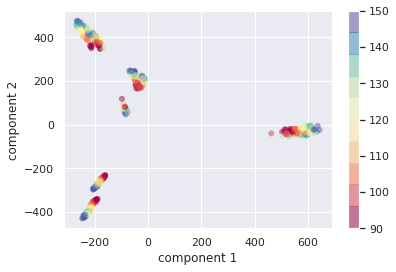

In [ ]:
# digits = load_digits()
data_scg = data[:,:1000]
print(data_scg.shape)
data_label = data[:,-2]
pca = PCA(2)  # project from 1000 to 2 dimensions
projected = pca.fit_transform(data_scg)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
            c=data_label, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

##Discussion
###Pros:
####(1) It only needs variance to measure the amount of information.
####(2) The principal components are orthogonal. Preserve no mutual influence between the original data components.
####(3)The calculation is simple, and the main operation is eigenvalue decomposition, which is easy to implement.
###Cons:
####(1) Potential information loss.
####(2) Result suffers from outliers since using SVD decomposition.
####(3) Each principal component is could be not explanable in the real world.